In [71]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/boston_housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


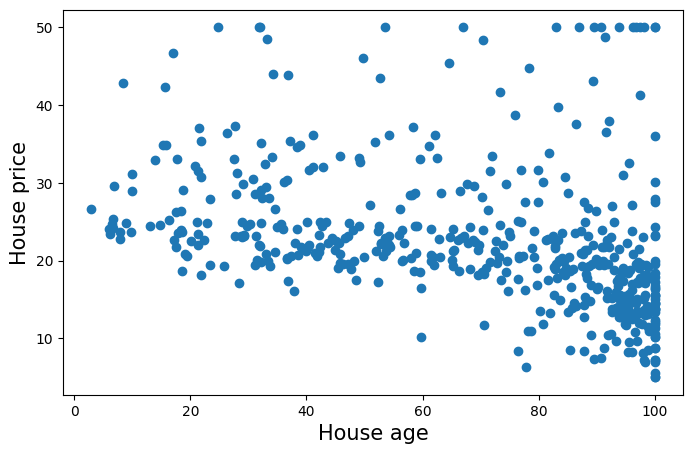

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.scatter(x = df['AGE'], y = df['MEDV'], color = 'Tab:blue')
plt.xlabel('House age', fontsize = 15)
plt.ylabel('House price', fontsize = 15)
plt.show()

In [40]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [63]:
features_names = df.columns.to_list()[:-1]
X = df[features_names]
Y = df['MEDV']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [65]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)


LinearRegression()

In [66]:
pred = my_linear_regression.predict(X_test)
pred

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

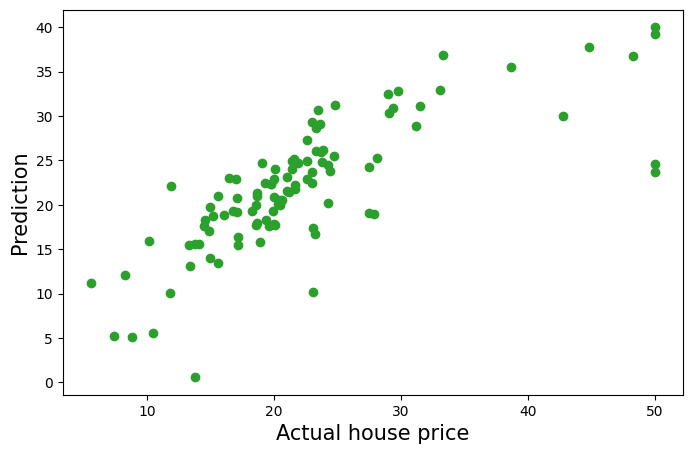

In [67]:
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:green')
plt.xlabel('Actual house price', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [68]:
print('The model r2 score is: {}'.format(my_linear_regression.score(X_train, Y_train)))

The model r2 score is: 0.7730135569264234


In [69]:
print('The intercept (b_0) is {}'.format(my_linear_regression.intercept_))
for i in range (len(features_names)):
 print('The coef (b_{}) is {}'.format(i+1, my_linear_regression.coef_[i]))

The intercept (b_0) is 38.091694926302296
The coef (b_1) is -0.11944344700245772
The coef (b_2) is 0.04477995106651231
The coef (b_3) is 0.005485261681771535
The coef (b_4) is 2.34080360624206
The coef (b_5) is -16.1236043154297
The coef (b_6) is 3.708709012219132
The coef (b_7) is -0.0031210817807358453
The coef (b_8) is -1.3863973702786796
The coef (b_9) is 0.2441783269888148
The coef (b_10) is -0.010989636563080024
The coef (b_11) is -1.0459211887459703
The coef (b_12) is 0.0081101069327052
The coef (b_13) is -0.49279272450471084


In [98]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [108]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAPE:', MAPE(Y_test, pred), "%")

Mean Absolute Error: 3.8429092204444983
Mean Squared Error: 33.44897999767639
Root Mean Squared Error: 5.783509315085123
MAPE: 18.35628529390647 %


In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(data_norm, columns = df.columns.to_list())

In [110]:
df_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [111]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
X = df_norm[features_names]
Y = df_norm['MEDV']
my_linear_regression.fit(X, Y)

LinearRegression()

In [112]:
summary = pd.DataFrame({'Features':features_names, 'Scores':my_linear_regression.coef_})
summary

,Features,Scores
0,CRIM,-0.213550
1,ZN,0.103157
2,INDUS,0.012463
3,CHAS,0.059705
4,NOX,-0.191879
5,RM,0.441860
6,AGE,0.001494
7,DIS,-0.360592
8,RAD,0.156425
9,TAX,-0.143629


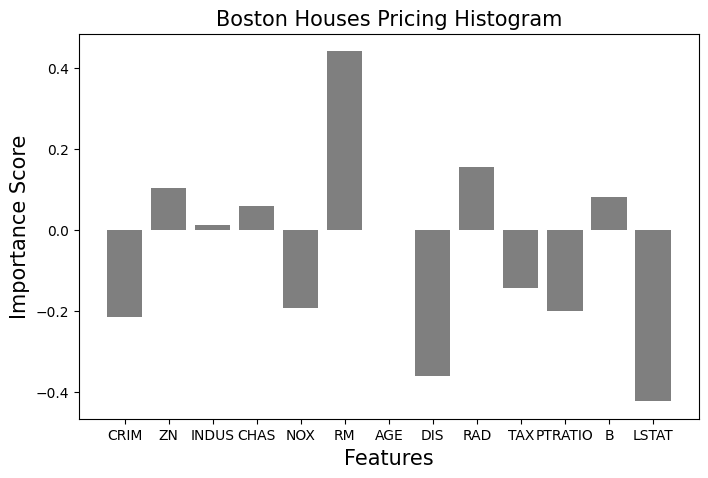

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.bar(x = summary['Features'], height = summary['Scores'], color = 'Tab:grey')
plt.title('Boston Houses Pricing Histogram', fontsize = 15)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Importance Score', fontsize = 15)
plt.show()